In [3]:
import numpy as np
import cv2 
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
pip install matplotlib

     |████████████████████████████████| 7.2 MB 56 kB/s eta 0:00:014
     |████████████████████████████████| 61 kB 45 kB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 71 kB/s eta 0:00:017
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
path = 'Obito.jpg'

In [11]:
img = mpimg.imread(path)

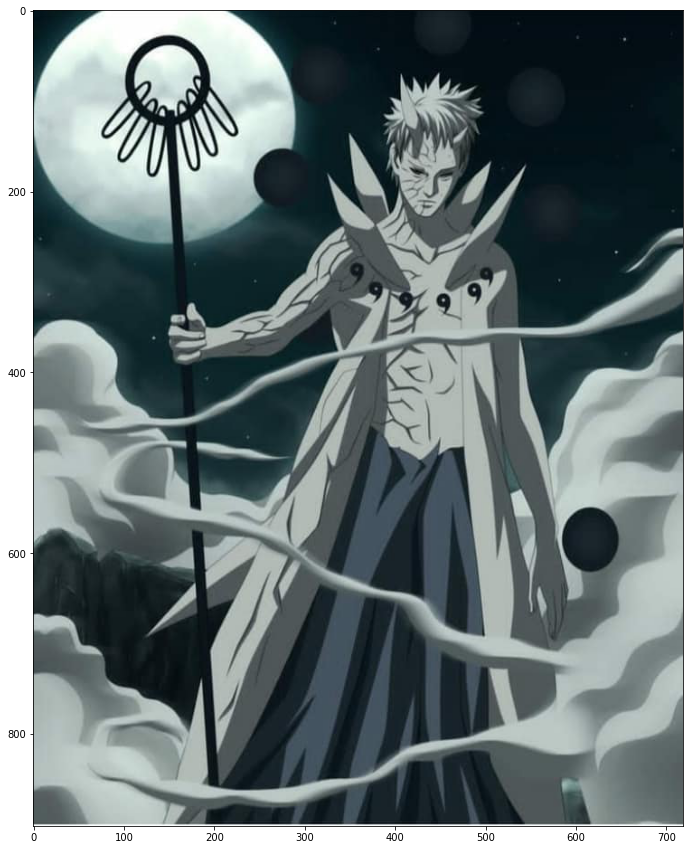

In [15]:
plt.rcParams['figure.figsize'] = [18, 15]
plt.imshow(img)

In [16]:
#Create mapping function 
def mapping_function(x, y):
    spl = UnivariateSpline(x, y)
    return spl(range(256))

In [17]:
def apply_warm(image):
    increase = mapping_function([0,64,128,192,256],[0,70,140,210,256])
    decrease = mapping_function([0,64,128,192,256],[0,40,90,150,256])
    red,blue,green = cv2.split(image)
    red = cv2.LUT(red, increase).astype(np.uint8)
    blue = cv2.LUT(red, decrease).astype(np.uint8)
    image = cv2.merge((red, blue, green))
    return image 
def apply_cool(image):
    increase = mapping_function([0,64,128,192,256],[0,70,140,210,256])
    decrease = mapping_function([0,64,128,192,256],[0,40,90,150,256])
    red,blue,green = cv2.split(image)
    red = cv2.LUT(red, decrease).astype(np.uint8)
    blue = cv2.LUT(red, increase).astype(np.uint8)
    image = cv2.merge((red, blue, green))
    return image 

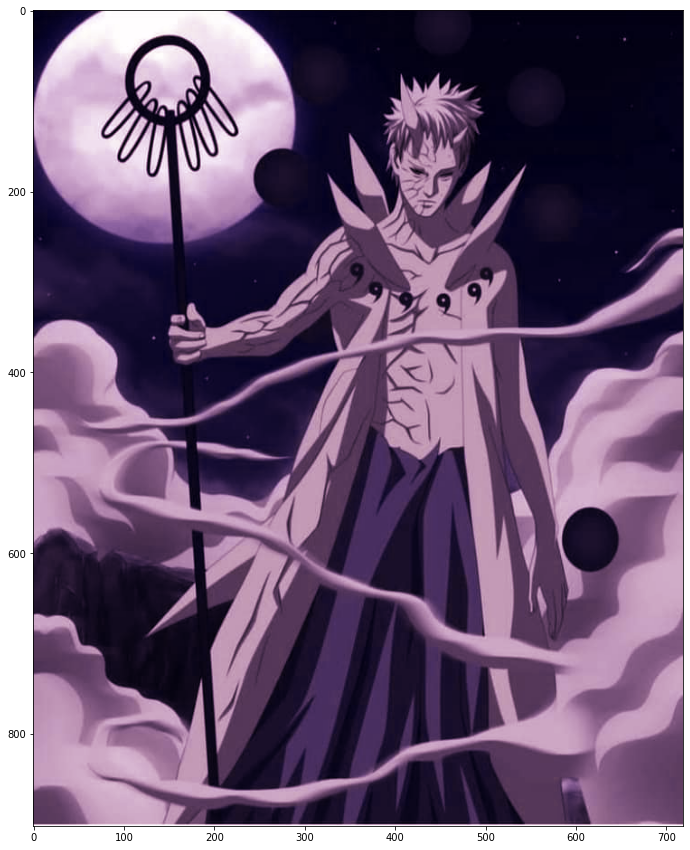

In [18]:
new_image = apply_warm(img)
plt.imshow(new_image)

In [19]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def choice(x,img):
    if x == 'Warm':
        return plt.imshow(apply_warm(img))
    if x == 'Cool':
        return plt.imshow(apply_cool(img))
    if x == 'No Filter':
        return plt.imshow((img))

In [20]:
interact(choice, x= widgets.Dropdown(options=['No Filter','Warm','Cool'], description = 'Filter'), img = fixed(img));

interactive(children=(Dropdown(description='Filter', options=('No Filter', 'Warm', 'Cool'), value='No Filter')…